In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def convert(series):
    number = list()
    for i in series.to_numpy():
        number.append(float(i.replace(",",'.')))
    return np.array(number)

In [11]:
df = pd.read_csv('../../data/33/cw33_2.csv')
df

,I[A] R=3cm,U[V] R=3cm,I[A] R=4cm,U[V] R=4cm,I[A] R=5cm,U[V] R=5cm
0,"1,628","166,24","1,505","235,87","1,525","352,97"
1,"1,527","163,56","1,429","215,79","1,424","320,01"
2,"1,427","158,9","1,323","198,93","1,343","287,46"
3,"1,326","146,57","1,243","176,13","1,28","230,71"
4,"1,226","145,97","1,18","160,08","1,139","213,25"
5,"1,125","143,02","1,14","156,08","1,071",192


In [12]:
df = df.replace(to_replace=r'[,]', value='.', regex=True)
df =df.astype(float)


In [13]:
k = 0.827*10**(-3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   I[A] R=3cm  6 non-null      float64
 1   U[V] R=3cm  6 non-null      float64
 2   I[A] R=4cm  6 non-null      float64
 3   U[V] R=4cm  6 non-null      float64
 4   I[A] R=5cm  6 non-null      float64
 5   U[V] R=5cm  6 non-null      float64
dtypes: float64(6)
memory usage: 416.0 bytes


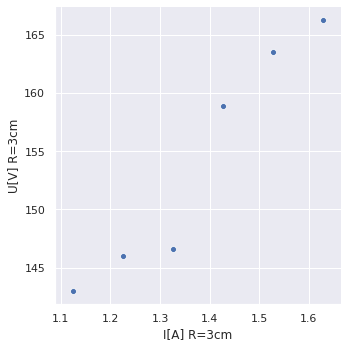

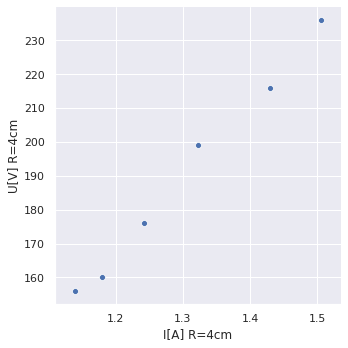

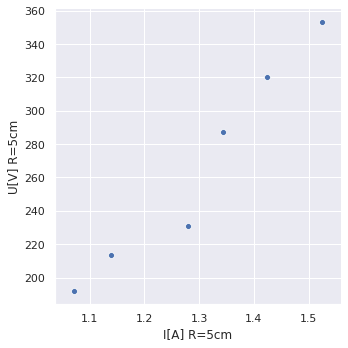

In [14]:
sns.set(style="darkgrid")
sns.relplot(y="U[V] R=3cm", x="I[A] R=3cm", data=df)
sns.relplot(y="U[V] R=4cm", x="I[A] R=4cm", data=df)
sns.relplot(y="U[V] R=5cm", x="I[A] R=5cm", data=df)

In [15]:
def regression(data_frame):
    models = list()
    r = 3
    for i in range(0,data_frame.columns.size-1,2):
        f = plt.figure()
        x = data_frame[data_frame.columns[i]].to_numpy() # I[A]
        y = data_frame[data_frame.columns[i+1]].to_numpy() #U[A]
        model = np.poly1d(np.polyfit(x, y, 1))
        line = np.linspace(0, 2)
        plt.figure(figsize=(10,10))
        plt.scatter(x,y)
        plt.xlabel("I[A]",fontsize = 20)
        plt.ylabel("U[V]",fontsize = 20)
        title = f'R={r} [cm]'
        plt.title(title, fontsize = 20)
        plt.plot(line, model(line))
        plt.show()
        models.append(model)
        r+=1                    
    return models

Index(['I[A] R=3cm', 'U[V] R=3cm', 'I[A] R=4cm', 'U[V] R=4cm', 'I[A] R=5cm',
       'U[V] R=5cm'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

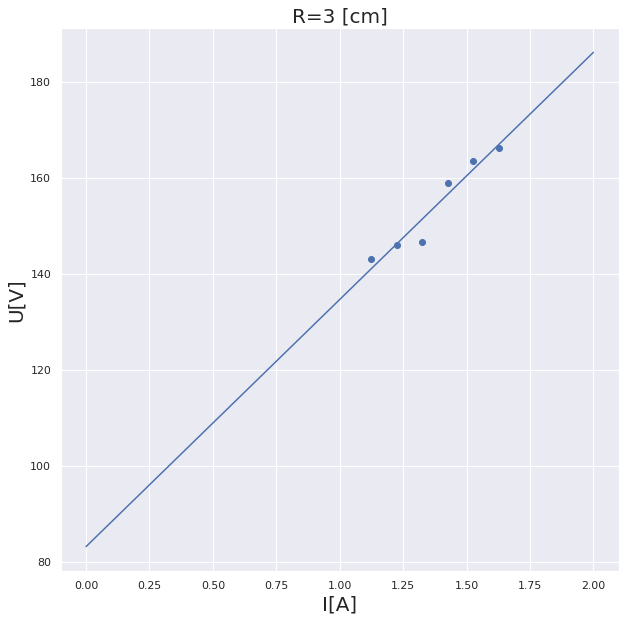

<Figure size 432x288 with 0 Axes>

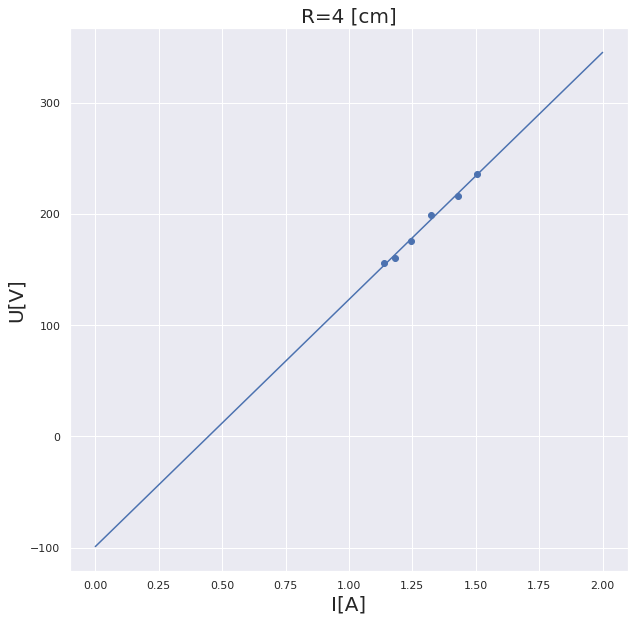

<Figure size 432x288 with 0 Axes>

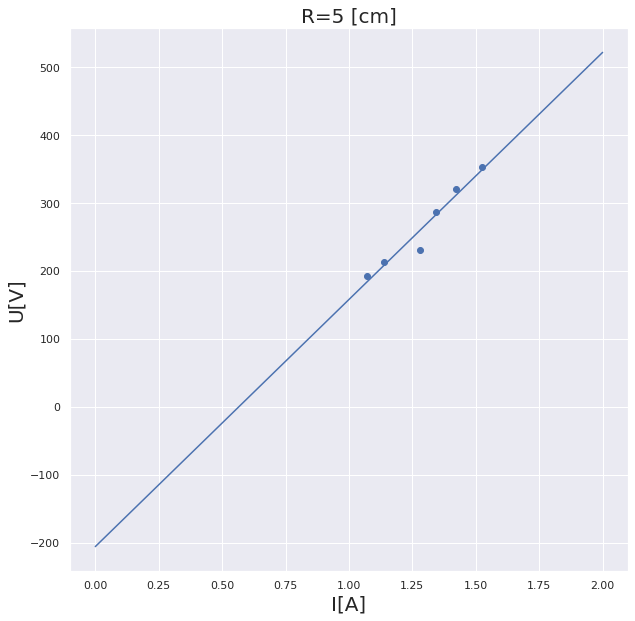

In [16]:
print(df.columns)
models = regression(df)

In [18]:
for i in models:
    print(i)                    


 
51.5 x + 83.16
 
222.1 x - 98.94
 
363.9 x - 205.9
